In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['figure.dpi'] = 300

from scipy.optimize import curve_fit

fts=12

Matplotlib is building the font cache; this may take a moment.


In [ ]:
data = pd.read_csv('Extended Data Fig. 3 iteration convergence.csv')
data

,iteration,ho2_mean_glob,ch3o2_mean_glob,ch3ooh_mean_glob,ho2_mean_land,ch3o2_mean_land,ch3ooh_mean_land
0,0,1.007553e+08,6.801647e+07,6.754535e+09,3.192089e+07,1.516037e+07,6.948275e+08
1,1,1.015822e+08,8.711602e+07,8.242158e+09,3.959130e+07,1.594287e+07,8.776082e+08
2,2,9.951722e+07,9.253380e+07,8.443686e+09,3.969327e+07,1.619936e+07,8.982037e+08
3,3,9.901203e+07,9.354321e+07,8.451055e+09,3.975410e+07,1.623499e+07,9.024641e+08
4,4,9.891048e+07,9.362798e+07,8.444239e+09,3.975849e+07,1.624294e+07,9.031771e+08
5,5,9.890837e+07,9.359856e+07,8.441956e+09,3.975966e+07,1.624437e+07,9.033187e+08
6,6,9.891491e+07,9.358202e+07,8.441723e+09,3.975982e+07,1.624466e+07,9.033454e+08
7,7,9.891792e+07,9.357772e+07,8.441846e+09,3.975985e+07,1.624472e+07,9.033508e+08
8,8,9.891869e+07,9.357729e+07,8.441924e+09,3.975986e+07,1.624473e+07,9.033518e+08
9,9,9.891878e+07,9.357748e+07,8.441949e+09,3.975986e+07,1.624473e+07,9.033521e+08


In [3]:
def logistic_func(x, L, k, x0, C):
    return C + L / (1 + np.exp(-k*(x-x0)))

x_data = data['iteration']
y_data = data['ho2_mean_glob']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('Global HO₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])
print("C =", params[3])

Global HO₂ fitting parameters:
L = -0.022461261012193333
k = 19.893744311435192
x₀ = 1.948649049250658
C = 1.0116875027906898


In [63]:
1.0116875027906898-0.022461261012193333+0.09164855262748964

1.080874794405986

In [55]:
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k*(x-x0)))

x_data = data['iteration']
y_data = -data['ho2_mean_glob']*10**(-8) + 0.9

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('Global HO₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

Global HO₂ fitting parameters:
L = -0.09164855262748964
k = 6.575908542066768
x₀ = -6.140791723050296


In [4]:
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k*(x-x0)))
    
x_data = data['iteration']
y_data = data['ch3o2_mean_glob']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('Global CH₃O₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

Global CH₃O₂ fitting parameters:
L = 0.9360441575128644
k = 1.6421426879114478
x₀ = -0.594620386309325


In [5]:
x_data = data['iteration']
y_data = data['ch3ooh_mean_glob']*10**(-10)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('Global CH₃OOH fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

Global CH₃OOH fitting parameters:
L = 0.8443543270085393
k = 2.3472547230198546
x₀ = -0.5904126100431288


In [6]:
x_data = data['iteration']
y_data = data['ho2_mean_land']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('ILS HO₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

ILS HO₂ fitting parameters:
L = 0.39756228052870884
k = 4.0636266159475545
x₀ = -0.345657052296741


In [7]:
x_data = data['iteration']
y_data = data['ch3o2_mean_land']*10**(-8)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('ILS CH₃O₂ fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

ILS CH₃O₂ fitting parameters:
L = 0.16246194435496125
k = 1.3802978566225677
x₀ = -1.9084166834610163


In [8]:
x_data = data['iteration']
y_data = data['ch3ooh_mean_land']*10**(-10)

params, params_covariance = curve_fit(logistic_func, x_data, y_data)

print('ILS CH₃OOH fitting parameters:')
print("L =", params[0])
print("k =", params[1])
print("x₀ =", params[2])

ILS CH₃OOH fitting parameters:
L = 0.09032029474248644
k = 2.3101512262107367
x₀ = -0.5214261283327033


In [15]:
seq_smooth = pd.DataFrame()
seq = np.arange(0,21,0.01)
seq_smooth['seq'] = seq
seq_smooth

,seq
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04
...,...
2095,20.95
2096,20.96
2097,20.97
2098,20.98


In [65]:
y1 = 1.080874794405986 - 0.09164855262748964 / (1 + np.exp(-2.3101512262107367*(seq_smooth[['seq']]-(-0.5214261283327033))))
y2 = 0.9360441575128644 / (1 + np.exp(-1.6421426879114478*(seq_smooth[['seq']]-(-0.594620386309325))))
y3 = 0.8443543270085393 / (1 + np.exp(-2.3472547230198546*(seq_smooth[['seq']]-(-0.5904126100431288))))
y4 = 0.39756228052870884 / (1 + np.exp(-4.0636266159475545*(seq_smooth[['seq']]-(-0.345657052296741))))
y5 = 0.16246194435496125 / (1 + np.exp(-1.3802978566225677*(seq_smooth[['seq']]-(-1.9084166834610163))))
y6 = 0.09032029474248644 / (1 + np.exp(-2.3101512262107367*(seq_smooth[['seq']]-(-0.5214261283327033))))

In [67]:
seq_smooth['ho2_fit_glob'] = y1
seq_smooth['ch3o2_fit_glob'] = y2
seq_smooth['ch3ooh_fit_glob'] = y3
seq_smooth['ho2_fit_land'] = y4
seq_smooth['ch3o2_fit_land'] = y5
seq_smooth['ch3ooh_fit_land'] = y6

In [71]:
data_short = data[data['iteration']<5]
data_short

,iteration,ho2_mean_glob,ch3o2_mean_glob,ch3ooh_mean_glob,ho2_mean_land,ch3o2_mean_land,ch3ooh_mean_land
0,0,1.007553e+08,6.801647e+07,6.754535e+09,3.192089e+07,1.516037e+07,6.948275e+08
1,1,1.015822e+08,8.711602e+07,8.242158e+09,3.959130e+07,1.594287e+07,8.776082e+08
2,2,9.951722e+07,9.253380e+07,8.443686e+09,3.969327e+07,1.619936e+07,8.982037e+08
3,3,9.901203e+07,9.354321e+07,8.451055e+09,3.975410e+07,1.623499e+07,9.024641e+08
4,4,9.891048e+07,9.362798e+07,8.444239e+09,3.975849e+07,1.624294e+07,9.031771e+08


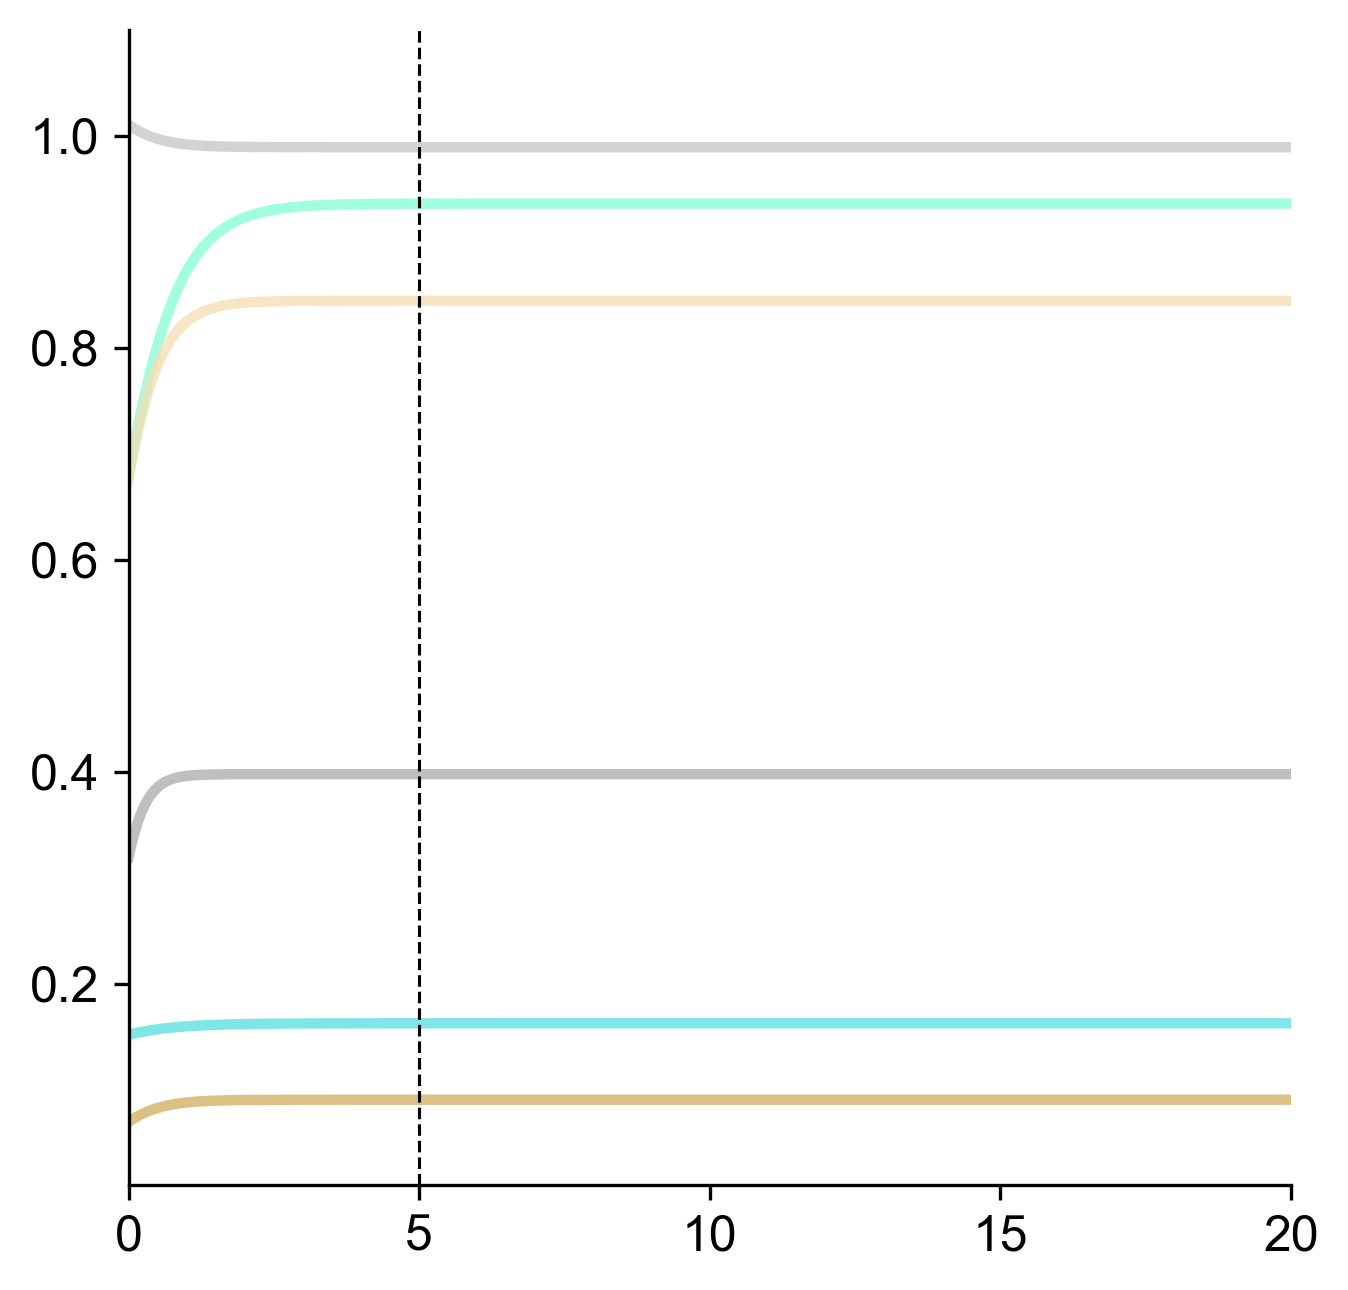

In [ ]:
matplotlib.rcParams['font.family'] = "Arial"
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

size = 175
a = 0.5

plt.plot(seq_smooth['seq'], seq_smooth['ho2_fit_glob'], c="darkgrey", linewidth=2.5, alpha=0.5)
plt.plot(seq_smooth['seq'], seq_smooth['ch3o2_fit_glob'], c="aquamarine", linewidth=2.5, alpha=0.75)
plt.plot(seq_smooth['seq'], seq_smooth['ch3ooh_fit_glob'], c="wheat", linewidth=2.5, alpha=0.75)

plt.plot(seq_smooth['seq'], seq_smooth['ho2_fit_land'], c="grey", linewidth=2.5, alpha=0.5)
plt.plot(seq_smooth['seq'], seq_smooth['ch3o2_fit_land'], c="darkturquoise", linewidth=2.5, alpha=0.5)
plt.plot(seq_smooth['seq'], seq_smooth['ch3ooh_fit_land'], c="darkgoldenrod", linewidth=2.5, alpha=0.5)

plt.xlim([0,20])
plt.ylim([0.01, 1.1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks([0,5,10,15,20], fontsize=fts)
plt.yticks([0.2,0.4,0.6,0.8,1.0], fontsize=fts)

plt.axvline(x=5, linestyle = '--', linewidth=0.75, color="black")
#plt.axhline(y=0.9891873, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.9357764, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.3975986, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.1624473, linestyle = '--', linewidth=0.5)

plt.savefig("Extended Data Fig. 3a.pdf", format="pdf", bbox_inches="tight")

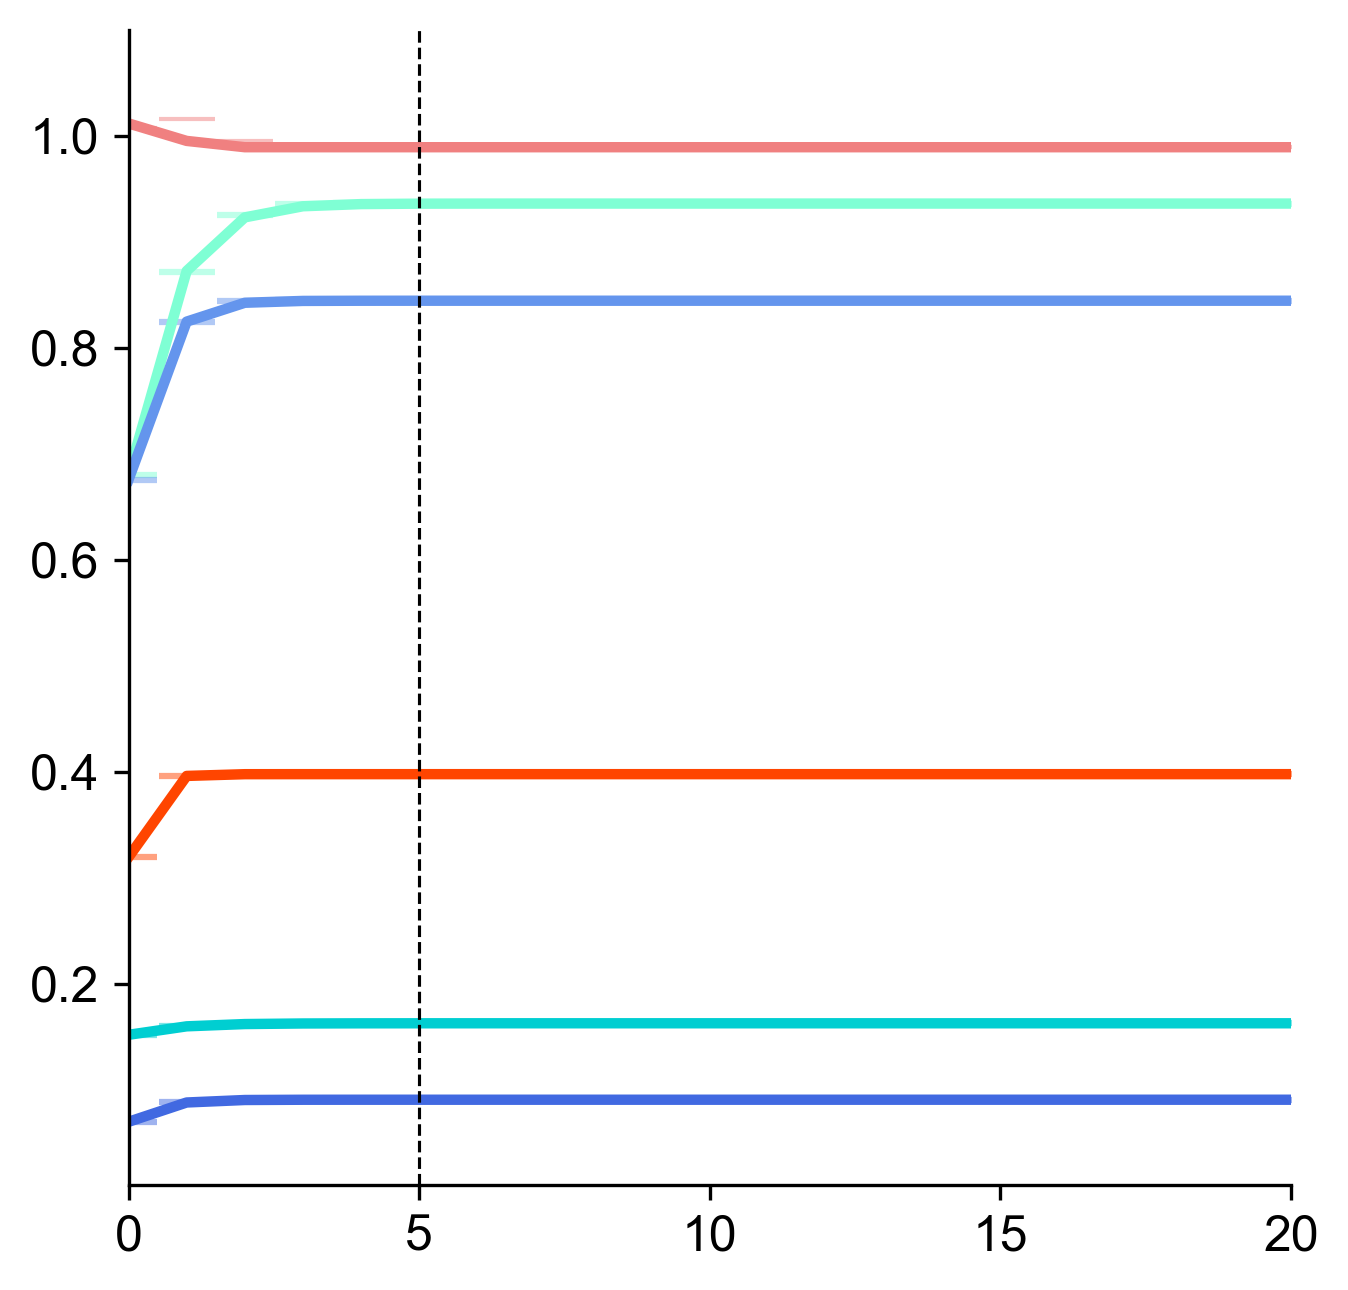

In [ ]:
matplotlib.rcParams['font.family'] = "Arial"
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

size = 175
a = 0.5

#plt.plot(data['iteration'], data['ho2_mean_glob']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")
#plt.plot(data['iteration'], data['ch3o2_mean_glob']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")
#plt.plot(data['iteration'], data['ho2_mean_land']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")
#plt.plot(data['iteration'], data['ch3o2_mean_land']*10**(-8), markersize=size, c=None, alpha=0.5, marker="o")

plt.scatter(data['iteration'], data['ho2_mean_glob']*10**(-8), s=size, edgecolor="black", c="lightcoral", alpha=a, marker="_")
plt.scatter(data['iteration'], data['ch3o2_mean_glob']*10**(-8), s=size, edgecolor="black", c="aquamarine", alpha=a, marker="_")
plt.scatter(data['iteration'], data['ch3ooh_mean_glob']*10**(-10), s=size, edgecolor="black", c="cornflowerblue", alpha=a, marker="_")

plt.scatter(data['iteration'], data['ho2_mean_land']*10**(-8), s=size, edgecolor="black", c="orangered", alpha=a, marker="_")
plt.scatter(data['iteration'], data['ch3o2_mean_land']*10**(-8), s=size, edgecolor="black", c="darkturquoise", alpha=a, marker="_")
plt.scatter(data['iteration'], data['ch3ooh_mean_land']*10**(-10), s=size, edgecolor="black", c="royalblue", alpha=a, marker="_")

plt.plot(data['iteration'], data['ho2_fit_glob'], c="lightcoral", linewidth=2.5)
plt.plot(data['iteration'], data['ch3o2_fit_glob'], c="aquamarine", linewidth=2.5)
plt.plot(data['iteration'], data['ch3ooh_fit_glob'], c="cornflowerblue", linewidth=2.5)

plt.plot(data['iteration'], data['ho2_fit_land'], c="orangered", linewidth=2.5)
plt.plot(data['iteration'], data['ch3o2_fit_land'], c="darkturquoise", linewidth=2.5)
plt.plot(data['iteration'], data['ch3ooh_fit_land'], c="royalblue", linewidth=2.5)

plt.xlim([0,20])
plt.ylim([0.01, 1.1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks([0,5,10,15,20], fontsize=fts)
plt.yticks([0.2,0.4,0.6,0.8,1.0], fontsize=fts)

plt.axvline(x=5, linestyle = '--', linewidth=0.75, color="black")
#plt.axhline(y=0.9891873, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.9357764, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.3975986, linestyle = '--', linewidth=0.5)
#plt.axhline(y=0.1624473, linestyle = '--', linewidth=0.5)

plt.savefig("Extended Data Fig. 3a.pdf", format="pdf", bbox_inches="tight")